# 用单层感知器实现iris上的softmax分类器

在这个任务中，您将使用numpy实现单层感知机，完成本任务后，您将能够：

- 建立单层感知机，实现在iris数据集上的分类任务
- 熟悉Softmax函数的实现，以及如何使用它来实现多分类问题
- 熟悉cross-entropy损失函数的实现，以及如何使用它来衡量模型的预测精度
- 了解独热编码的实现，以及如何将原始数据转换为独热编码形式
- 使用 sklearn 库中的 LogisticRegression 类来实现单层感知机分类器

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from utils import plot_decision_boundary

%matplotlib inline 
np.random.seed(2024) 

首先加载iris数据集，该数据集包含150个样本，每个样本有四个特征，分别是花萼长度、花萼宽度、花瓣长度、花瓣宽度，总共包含3个类别，分别是山鸢尾、变色鸢尾、维吉尼亚鸢尾。

简单起见，我们选取两个特征first_dim, second_dim来作可视化以及后续的分类任务。

运行以下代码，加载iris数据集，并输出其数据集的形状以及可视化。

iris.data.shape: (150, 4)
iris.target.shape: (150,)


<Figure size 600x400 with 0 Axes>

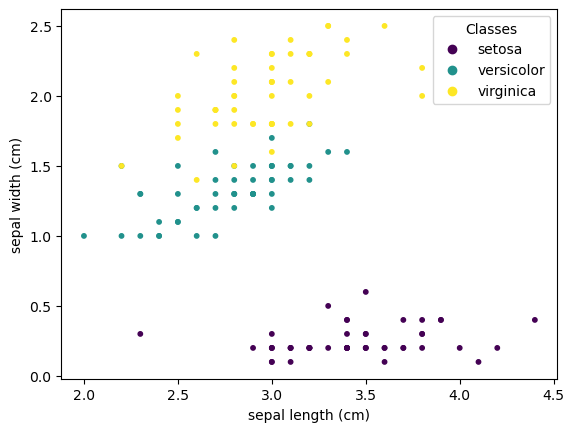

In [2]:
iris = load_iris()
print("iris.data.shape:", iris.data.shape)
print("iris.target.shape:", iris.target.shape)

plt.figure(figsize=(6,4))
_, ax = plt.subplots()
first_dim, second_dim = 1, 3 # 我们选取两个特征进行可视化以及下面的分类
scatter = ax.scatter(iris.data[:, first_dim], iris.data[:, second_dim], c=iris.target, s=10)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(scatter.legend_elements()[0], iris.target_names, loc="best", title="Classes")

首先，您将使用numpy实现单层感知机，每个函数都有详细的说明来引导您完成。

In [3]:
class Perceptron:
    def __init__(self, input_size, output_size):
        """
        将w初始化为一个维度为(input_size, output_size)的随机向量, 并将b初始化为0
        """
        ####################################
        # Your Code Here

        self.weights = np.zeros((input_size, output_size))
        self.bias = np.zeros((output_size,))
        ####################################

        assert(self.weights.shape == (input_size, output_size))
        assert(self.bias.shape == (output_size,)) 

    def softmax(self, x):
        """
        softmax函数
        思考如何避免数值溢出
        """
        ####################################
        # Your Code Here

        softmax_x = np.zeros(x.shape)
        l = np.exp(x)
        for i in range(x.shape[0]):
            c = 0
            for j in range(x.shape[1]):
                c += l[i][j]
            for j in range(x.shape[1]):
                softmax_x[i][j] = l[i][j]/c
            
        ####################################
        return softmax_x
    
    def cross_entropy_loss(self, y_pred, y):
        """
        cross entropy损失
        """
        ####################################
        # Your Code Here

        loss = (-np.sum(y * np.log(y_pred)))/y.shape[0]
        """
        loss = 0
        for i in range(y.shape[0]):
            for j in range(y.shape[1]):
                if y[i][j] == 1:
                    loss += -np.log(y_pred[i][j])
        loss /= y.shape[0]
        """
        ####################################

        return loss

    def propagate(self, x):
        """
        前向传播
        """
        ####################################
        # Your Code Here

        y_pred = self.softmax(np.dot(x, self.weights) + self.bias)
        ####################################

        return y_pred

    def backward(self, x, y, y_pred, learning_rate):
        """
        实现后向传播, 通过运行梯度下降算法来优化w和b
        """
        m = x.shape[0]
        assert(y_pred.shape == y.shape)
        ####################################
        # Your Code Here
        self.weights = self.weights + (learning_rate * np.dot(x.T, (y - y_pred)))/m
        for i in range(y_pred.shape[1]):
            for j in range(y_pred.shape[0]):
                self.bias[i] = self.bias[i] + learning_rate * (y[j][i] - y_pred[j][i])/m
        # self.weights = None
        # self.bias = None
        ####################################
        

    def train(self, x, y, epochs, learning_rate, is_plot=True):
        """
        模型训练
        """
        losses = []
        for epoch in range(epochs):
            ####################################
            # Your Code Here

            # y_pred = None
            y_pred = self.propagate(x)
            self.backward(x, y, y_pred, learning_rate)
            ####################################
            loss = self.cross_entropy_loss(y_pred, y)
            print("loss = ", loss)   
            losses.append(loss)
            print(f"Epoch {epoch}, Loss: {loss}")

        if is_plot:
            plt.figure(figsize=(6,4))
            plt.plot(losses)
            plt.ylabel('loss')
            plt.xlabel('epoch')
            plt.title("Learning rate = " + str(learning_rate))
            plt.show()

        return self.weights, self.bias
    
    def predict(self, x, weights, bias):
        """
        通过学习得到的参数w和b进行预测
        """
        ####################################
        # Your Code Here
        y_pred = self.softmax(np.dot(x, weights) + bias)
        ####################################

        return np.argmax(y_pred, axis=1)
    
    def evaluate(self, y, y_pred):
        return np.mean(y_pred== np.argmax(y, axis=1))


将iris数据集的标记变为独热编码形式，并将其分为训练集和测试集。

In [4]:
# Load and preprocess the Iris dataset
x = iris.data[:,[first_dim, second_dim]]
y = iris.target

# Convert labels to one-hot encoded vectors
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2024)

调用上面实现的功能来构建模型并进行训练。

运行下面的代码，将输出训练过程中的损失值，损失曲线，训练准确率以及决策边界。

loss =  1.0986122886681098
Epoch 0, Loss: 1.0986122886681098
loss =  1.0800181091265157
Epoch 1, Loss: 1.0800181091265157
loss =  1.0627751221423274
Epoch 2, Loss: 1.0627751221423274
loss =  1.046410755082971
Epoch 3, Loss: 1.046410755082971
loss =  1.0307404563979634
Epoch 4, Loss: 1.0307404563979634
loss =  1.015684051975736
Epoch 5, Loss: 1.015684051975736
loss =  1.001198772029023
Epoch 6, Loss: 1.001198772029023
loss =  0.9872552802229861
Epoch 7, Loss: 0.9872552802229861
loss =  0.9738292220254121
Epoch 8, Loss: 0.9738292220254121
loss =  0.9608982981345754
Epoch 9, Loss: 0.9608982981345754
loss =  0.9484412834335313
Epoch 10, Loss: 0.9484412834335313
loss =  0.9364377211542756
Epoch 11, Loss: 0.9364377211542756
loss =  0.9248678445911582
Epoch 12, Loss: 0.9248678445911582
loss =  0.9137125700140246
Epoch 13, Loss: 0.9137125700140246
loss =  0.9029535071454949
Epoch 14, Loss: 0.9029535071454949
loss =  0.8925729695940855
Epoch 15, Loss: 0.8925729695940855
loss =  0.88255398014423

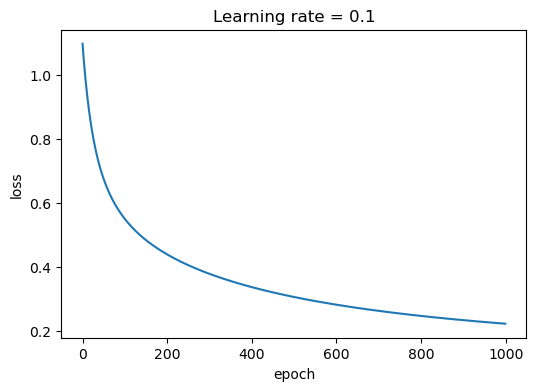

Accuracy of Training Dataset: 95.0 %


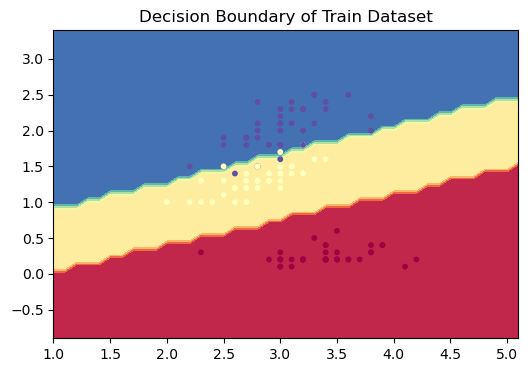

In [5]:
perceptron = Perceptron(input_size=x_train.shape[1], output_size=y_train.shape[1])
weights, bias = perceptron.train(x_train, y_train, epochs=1000, learning_rate=0.1)

y_train_pred = perceptron.predict(x_train, weights, bias)
print("Accuracy of Training Dataset:", format(perceptron.evaluate(y_train, y_train_pred) * 100), "%")

plot_decision_boundary(lambda x: perceptron.predict(x, weights, bias), x_train, np.argmax(y_train, axis=1), dataset='Train')

将训练好的模型在测试集上进行预测，输出测试准确率和决策边界。

Accuracy of Training Dataset: 93.33333333333333 %


d:\CODING\utils.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:,0], X[:,1], c=y, s=10, cmap=plt.cm.Spectral)


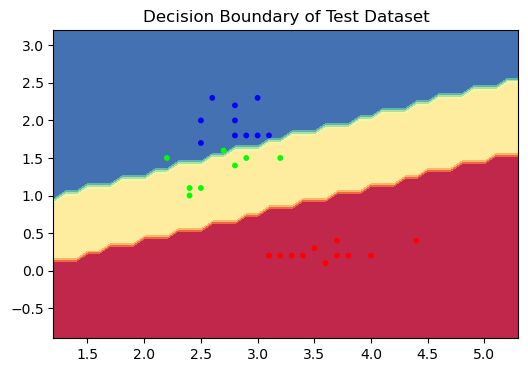

In [6]:
y_test_pred = perceptron.predict(x_test, weights, bias)
print("Accuracy of Training Dataset:", format(perceptron.evaluate(y_test, y_test_pred) * 100), "%")
plot_decision_boundary(lambda x: perceptron.predict(x, weights, bias), x_test, y_test, dataset='Test')

在工程应用中，用python手写代码来从头实现一个算法的可能性非常低，这样不仅耗时耗力，还不一定能够写出构架清晰，稳定性强的模型。更多情况下，是分析采集到的数据，根据数据特征选择适合的算法，在工具包中调用算法，调整算法的参数，获取需要的信息，从而实现算法效率和效果之间的平衡。

sklearn，正是这样一个可以帮助我们高效实现算法应用的工具包。sklearn是一个开源的基于python语言的机器学习工具包。它通过NumPy, SciPy和Matplotlib等python数值计算的库实现高效的算法应用，并且涵盖了几乎所有主流机器学习算法。

下面介绍如何使用sklearn.linear_model的LogisticRegression模型来实现iris数据集的分类。

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Model Score:  0.95


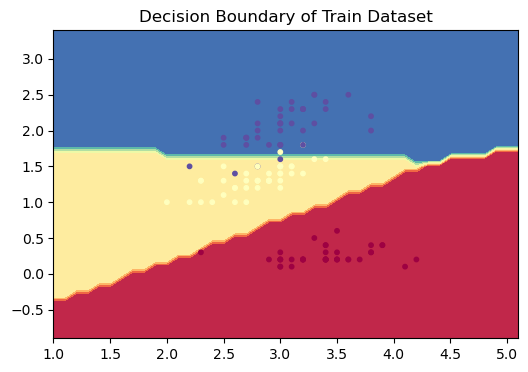

In [7]:
iris = load_iris()
x = iris.data[:,[first_dim, second_dim]]
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2024)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, verbose=2)
model.fit(x_train, y_train)

print("Model Score: ", model.score(x_train, y_train))
plot_decision_boundary(lambda x: model.predict(x), x_train, y_train, dataset='Train')

accuracy:  100.0 %


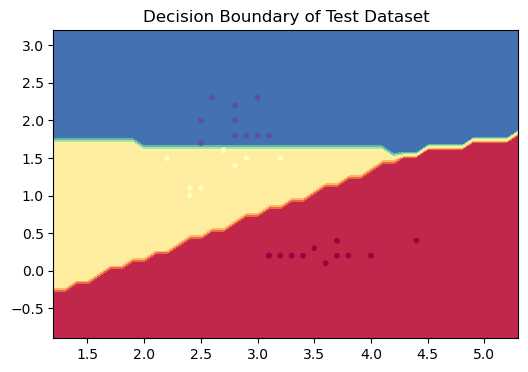

In [8]:
y_test_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
print("accuracy: ", accuracy * 100, "%")
plot_decision_boundary(lambda x: model.predict(x), x_test, y_test, dataset='Test')

您已经完成了这个任务! 

一些额外的任务包括：

- 为iris数据集选取不同的特征，并运行模型，分别观察模型的表现。
- 在softmax的实现中考虑防止数值溢出的机制。
- 尝试不同的epochs以及learning_rate，观察模型的表现。
- 在LogisticRegression中尝试不同的参数，如penalty、C、solver等，观察模型的表现。
- 尝试sklearn库中其他的分类模型，观察模型的表现。